# Elijah Walker
## ANA500 Microproject 1

# Step 1: Acquire (and import libraries)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# import tensorflow as tf # Troubleshooting this module to work on apple M1
mushroom_data = './mushrooms.csv'

df = pd.read_csv(mushroom_data)

# Step 2: Prepare

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
value_counts_dict = {}

# Iterate through each column
for col in df.columns:
    value_counts = df[col].value_counts()
    value_counts_dict[col] = value_counts

# Convert the dictionary to a DataFrame
value_counts_df = pd.DataFrame(value_counts_dict)

value_counts_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,400.0,210.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,NaN
b,NaN,452.0,NaN,168.0,NaN,NaN,NaN,NaN,5612.0,1728.0,...,NaN,432.0,432.0,NaN,NaN,NaN,NaN,48.0,NaN,NaN
c,NaN,4.0,NaN,44.0,NaN,192.0,NaN,6812.0,NaN,NaN,...,NaN,36.0,36.0,NaN,NaN,NaN,NaN,NaN,340.0,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3148.0
e,4208.0,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,96.0,...,NaN,96.0,96.0,NaN,NaN,NaN,2776.0,NaN,NaN,NaN
f,NaN,3152.0,2320.0,NaN,4748.0,2160.0,7914.0,NaN,NaN,NaN,...,600.0,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN
g,NaN,NaN,4.0,1840.0,NaN,NaN,NaN,NaN,NaN,752.0,...,NaN,576.0,576.0,NaN,NaN,NaN,NaN,NaN,NaN,2148.0
h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1632.0,NaN,NaN
k,NaN,828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.0,...,2304.0,NaN,NaN,NaN,NaN,NaN,NaN,1872.0,NaN,NaN


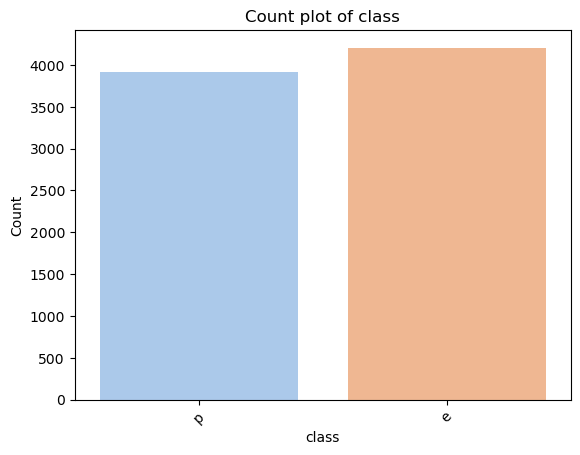

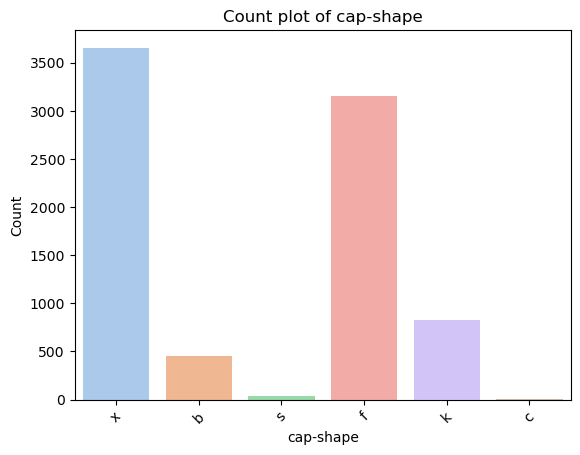

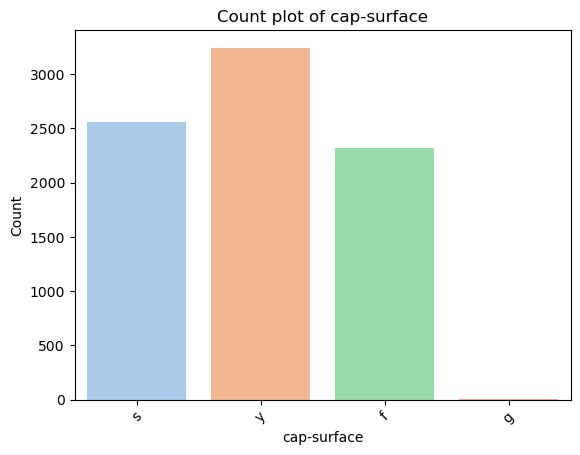

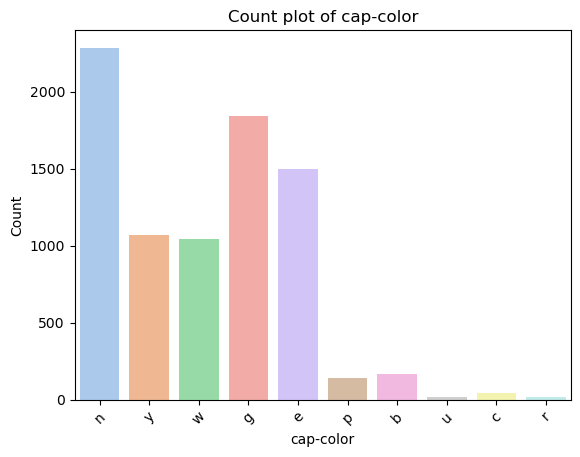

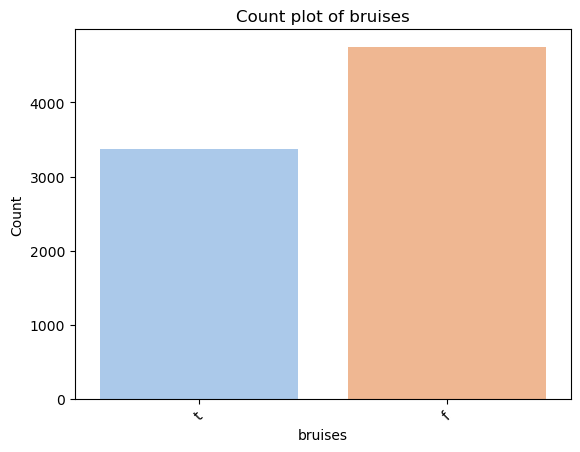

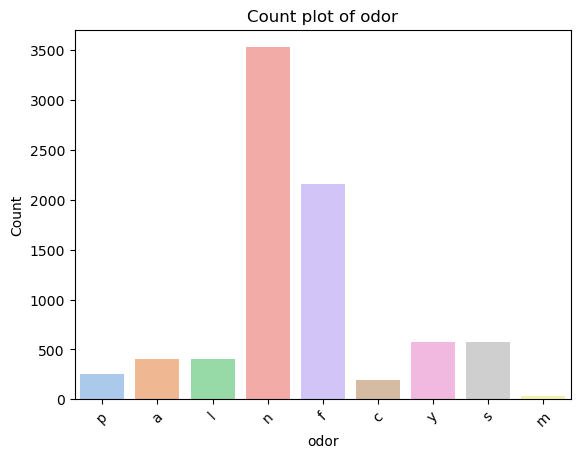

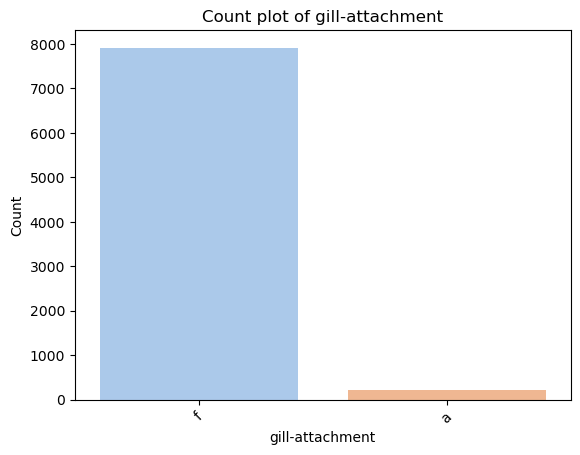

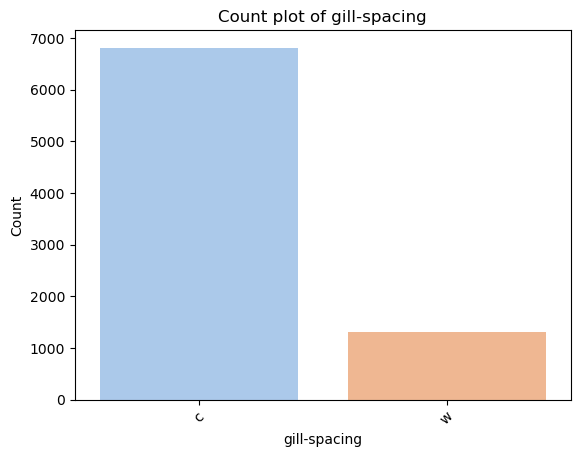

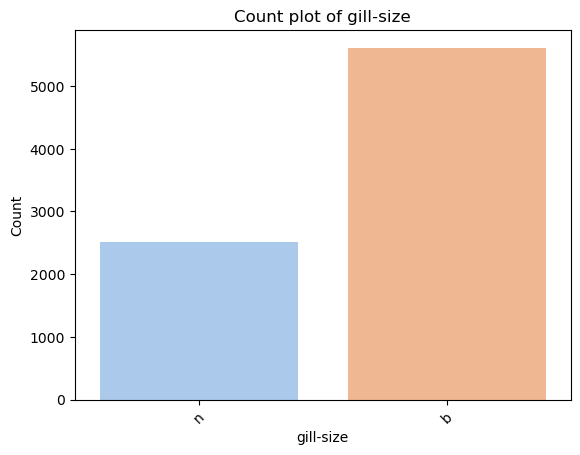

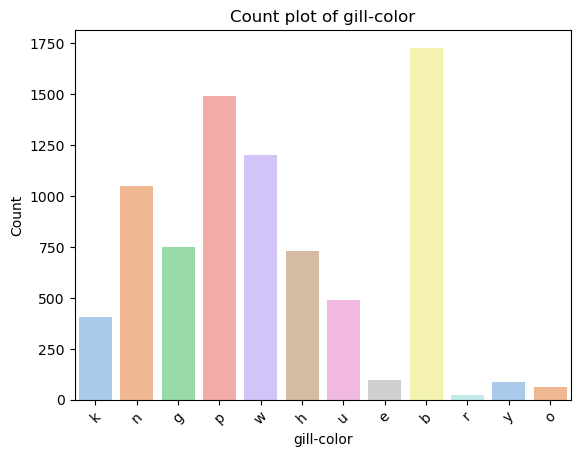

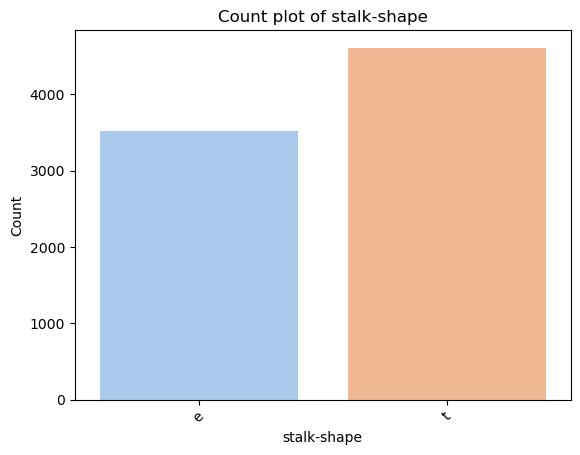

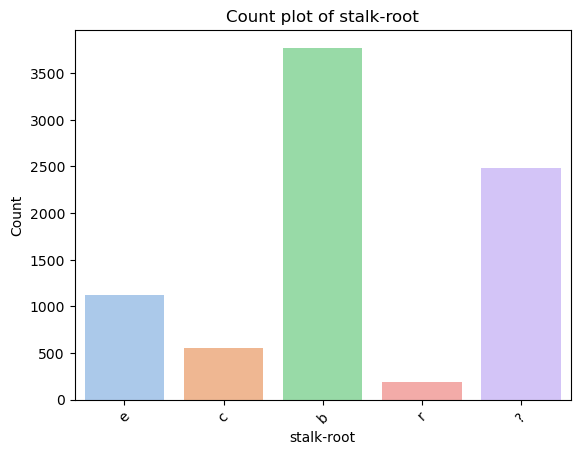

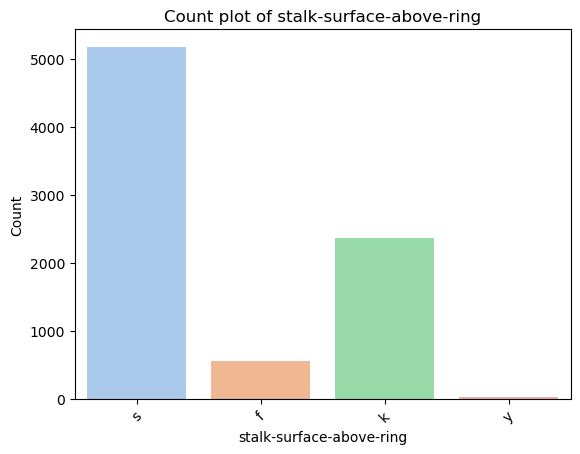

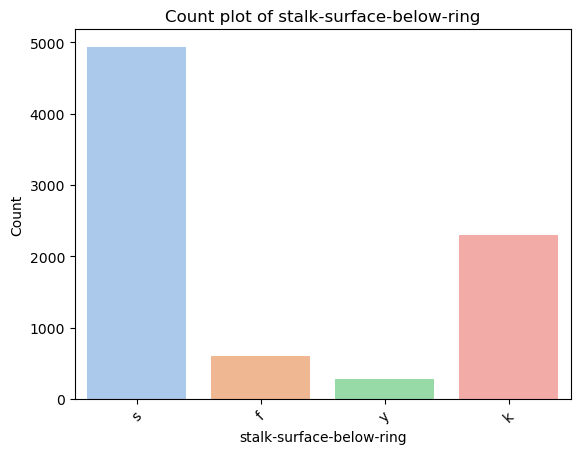

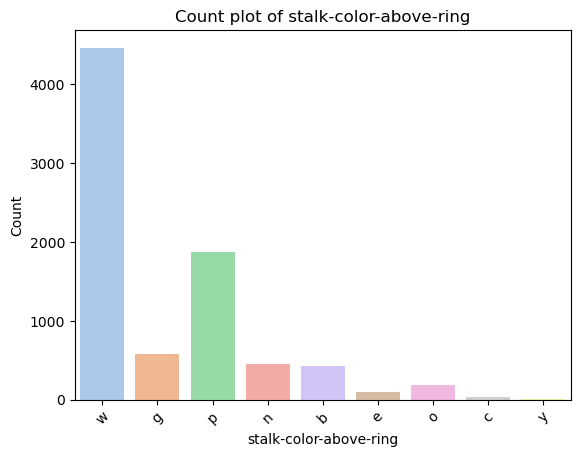

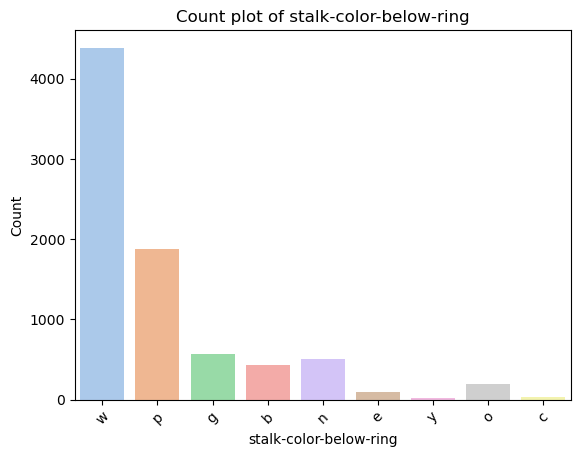

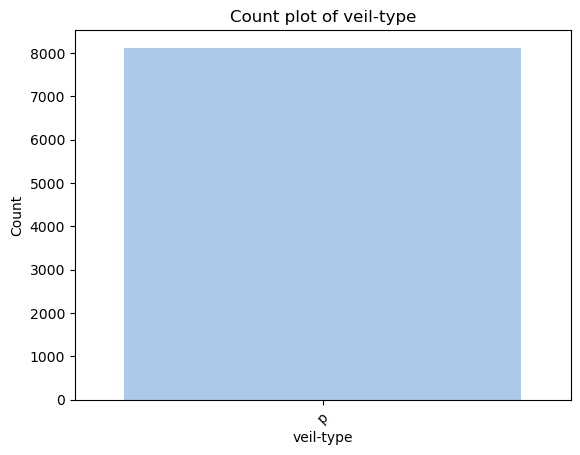

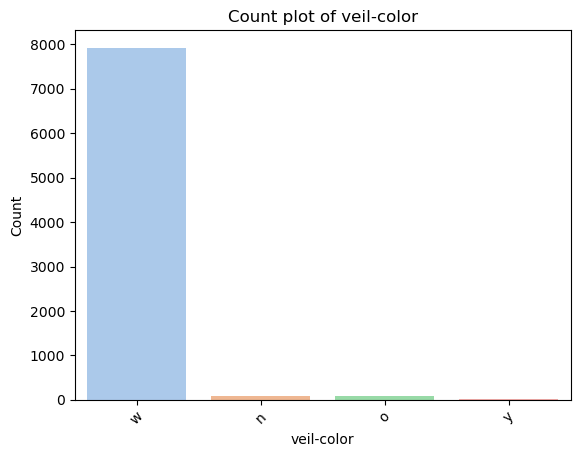

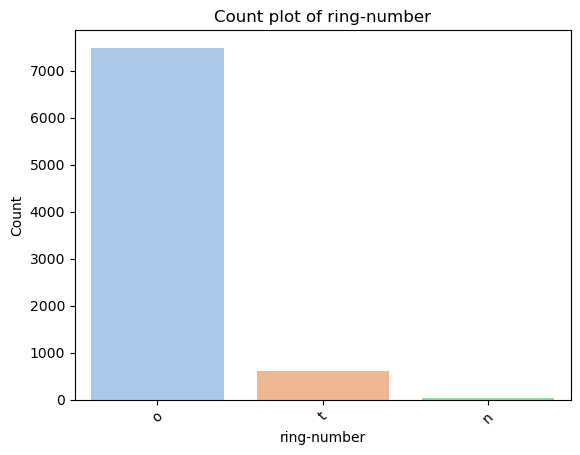

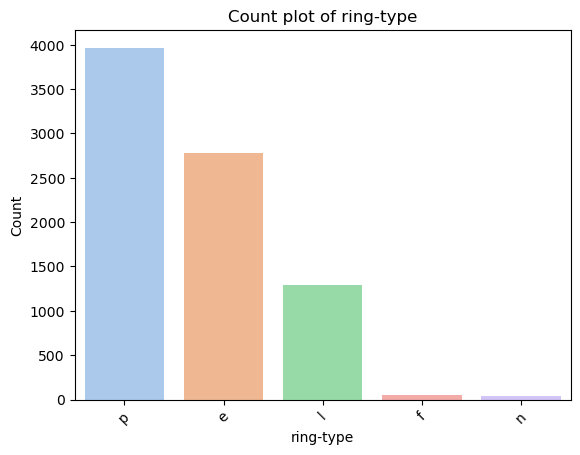

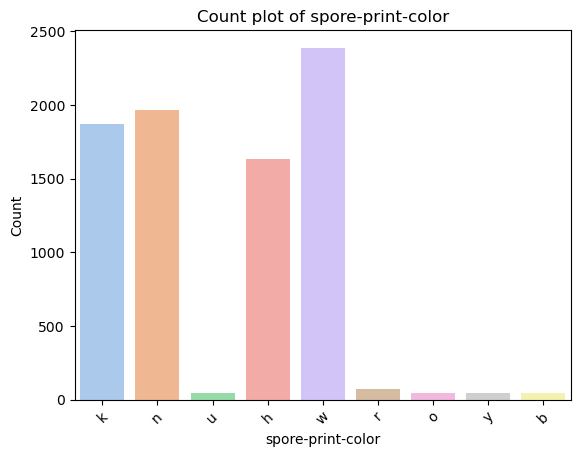

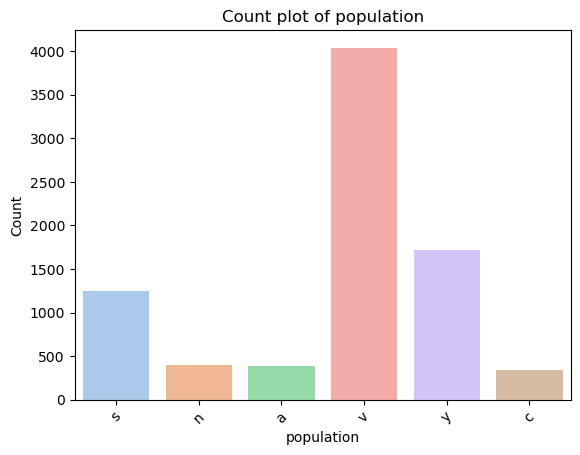

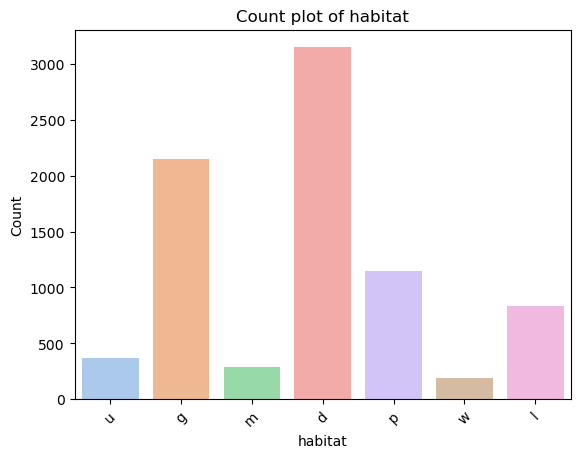

In [26]:
sns.set_palette("Set2")
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure()
        sns.countplot(x=column, data=df, palette='pastel')
        plt.title(f'Count plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

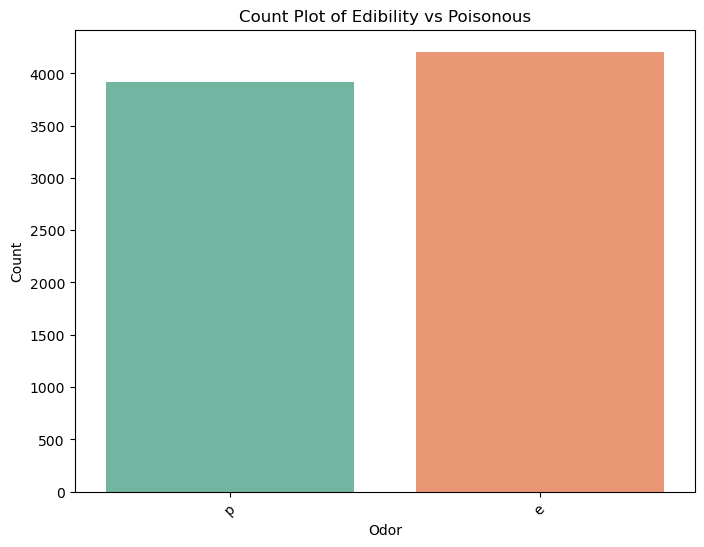

In [35]:
# Count plot for Target Variable Class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Count Plot of Edibility vs Poisonous')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

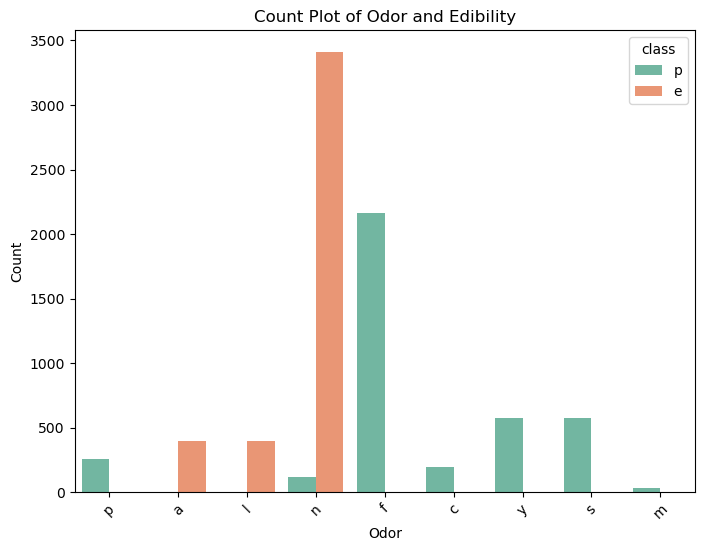

In [33]:
# Count plot for Odor
plt.figure(figsize=(8, 6))
sns.countplot(x='odor', hue='class', data=df)
plt.title('Count Plot of Odor and Edibility')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

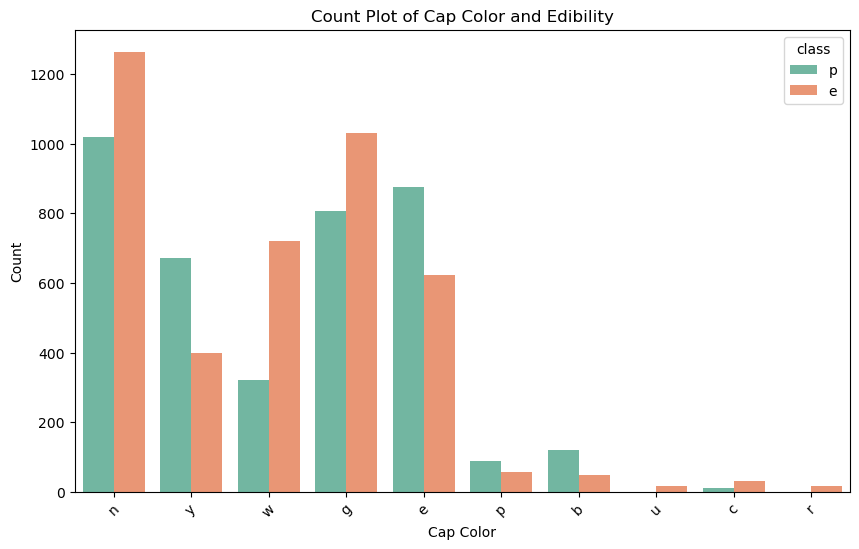

In [28]:
# Count plot for Cap Color
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-color', hue='class', data=df)
plt.title('Count Plot of Cap Color and Edibility')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

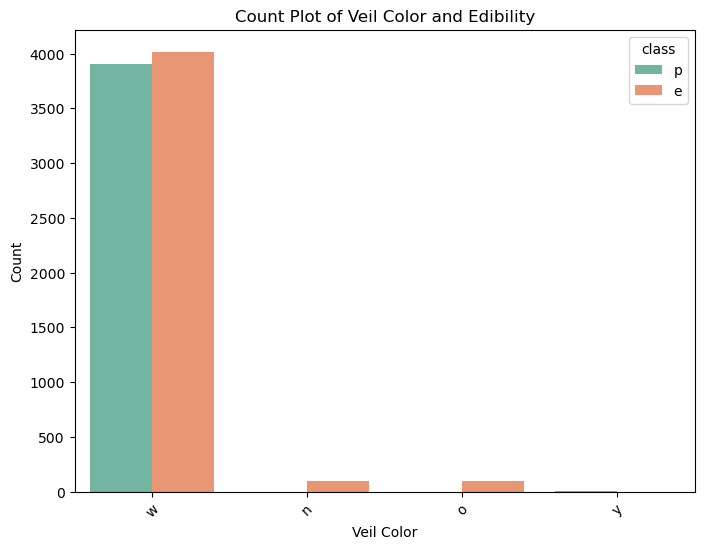

In [29]:
# Count plot for Veil Color (assuming more than one color is available)
plt.figure(figsize=(8, 6))
sns.countplot(x='veil-color', hue='class', data=df)
plt.title('Count Plot of Veil Color and Edibility')
plt.xlabel('Veil Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

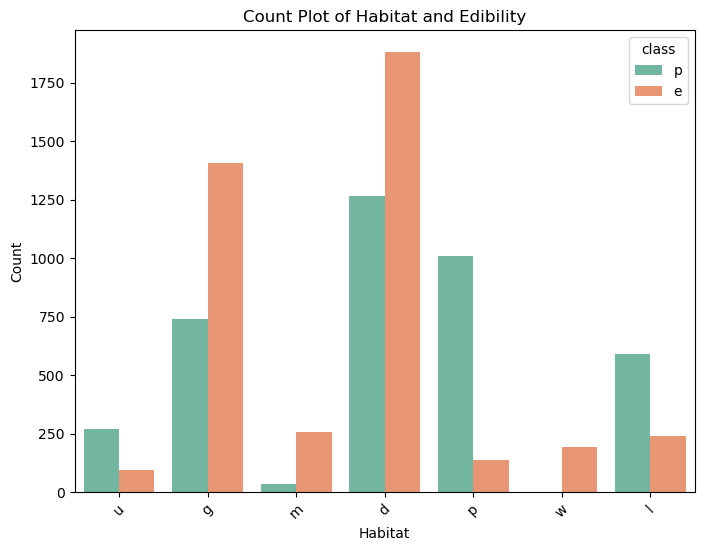

In [30]:
# Count plot for Habitat
plt.figure(figsize=(8, 6))
sns.countplot(x='habitat', hue='class', data=df)
plt.title('Count Plot of Habitat and Edibility')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


     ColumnA          ColumnB
0      apple         {orange}
1     banana  {banana, apple}
2     cherry     {pear, kiwi}
3  apple pie          {apple}
4      grape    {grape, kiwi}
5       pear          {peach}
